In [9]:
import pandas as pd
import numpy as np
from plotnine import *
import os
os.chdir('D:\Studia\MoCaDR_proj1')

In [10]:
# Col mean weight

# SVD1
res_svd1 = pd.read_csv('Results/results_svd1_all.csv')
res_svd1_long = pd.melt(res_svd1, id_vars=['r'], value_vars=res_svd1.columns[1:])
best_r = res_svd1_long.iloc[res_svd1_long['value'].idxmin()]['r']
best_rmse = res_svd1_long['value'].min()
# SVD2
res_svd2 = pd.read_csv('Results/results_svd2_all.csv')
res_svd2_long = pd.melt(res_svd2, id_vars=['r'], value_vars=res_svd2.columns[1:])
best_r2 = res_svd2_long.iloc[res_svd2_long['value'].idxmin()]['r']
best_rmse2 = res_svd2_long['value'].min()
# NMF
res_nmf = pd.read_csv('Results/results_nmf_all.csv')
res_nmf_long = pd.melt(res_nmf, id_vars=['r'], value_vars=res_nmf.columns[1:])
best_r3 = res_nmf_long.iloc[res_nmf_long['value'].idxmin()]['r']
best_rmse3 = res_nmf_long['value'].min()

# SVD 1

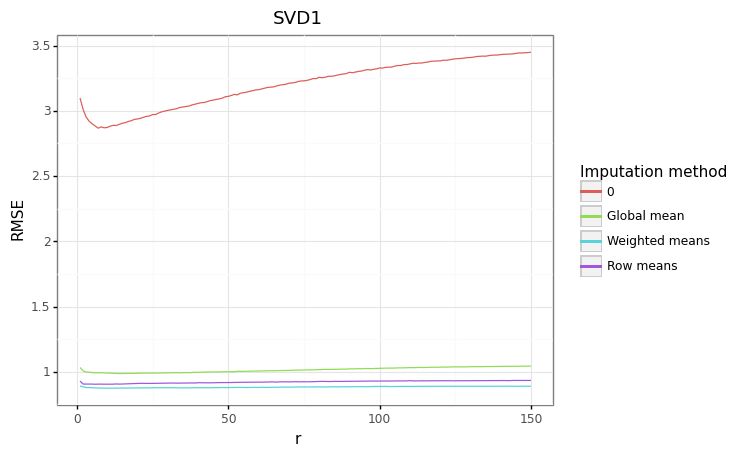

<ggplot: (157927795562)>

In [11]:
plot_svd1 = ggplot(res_svd1_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD1") + \
    scale_color_discrete(labels=['0', 'Global mean', 'Weighted means', 'Row means'])
plot_svd1

In [12]:
plot_svd1.save(filename='Report/fig/svd1_all.png')

d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: Report/fig/svd1_all.png


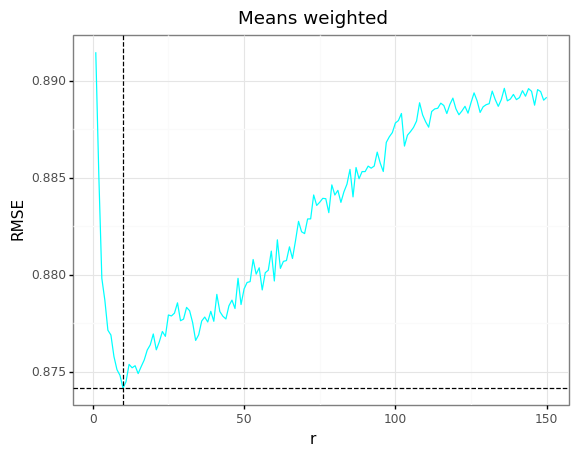

<ggplot: (157930088250)>

In [13]:
plot_svd1_w = ggplot(res_svd1_long[res_svd1_long['variable'] == 'rmse_means_weighted']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value'), color='cyan') + \
    geom_hline(yintercept=best_rmse, linetype='dashed', color='black') + \
    geom_vline(xintercept=best_r, linetype='dashed', color='black') + \
    labs(y='RMSE', title="Means weighted")
plot_svd1_w

In [14]:
plot_svd1_w.save(filename='Report/fig/svd1_w.png')

d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: Report/fig/svd1_w.png


# SVD2

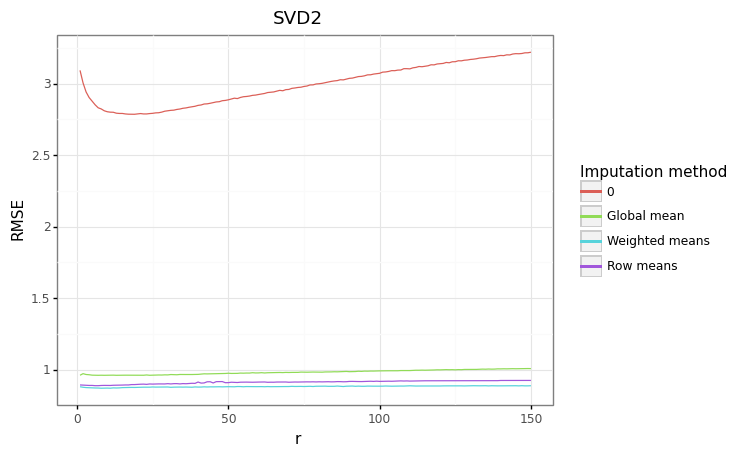

<ggplot: (157930239349)>

In [15]:
plot_svd2 = ggplot(res_svd2_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD2") + \
    scale_color_discrete(labels=['0', 'Global mean', 'Weighted means', 'Row means'])
plot_svd2

In [16]:
plot_svd2.save(filename='Report/fig/svd2_all.png')

d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: Report/fig/svd2_all.png


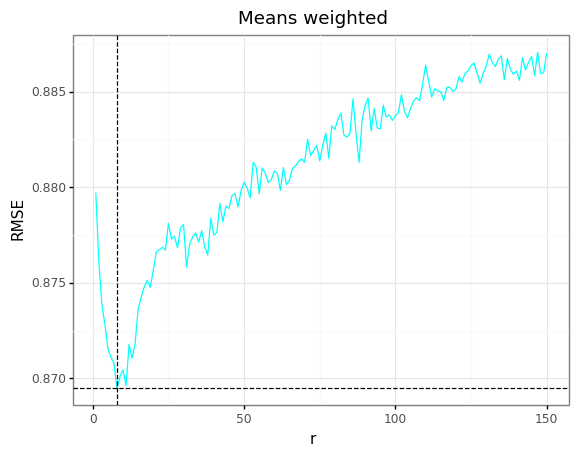

<ggplot: (157930275501)>

In [17]:
plot_svd2_w = ggplot(res_svd2_long[res_svd2_long['variable'] == 'rmse_means_weighted']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value'), color='cyan') + \
    geom_hline(yintercept=best_rmse2, linetype='dashed', color='black') + \
    geom_vline(xintercept=best_r2, linetype='dashed', color='black') + \
    labs(y='RMSE', title='Means weighted')
plot_svd2_w

In [18]:
plot_svd2_w.save(filename='Report/fig/svd2_w.png')

d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: Report/fig/svd2_w.png


# NMF

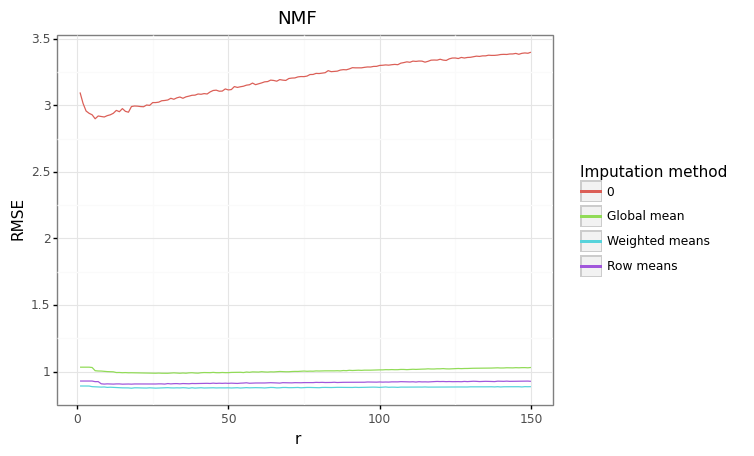

<ggplot: (157930260108)>

In [19]:
plot_nmf = ggplot(res_nmf_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="NMF") + \
    scale_color_discrete(labels=['0', 'Global mean', 'Weighted means', 'Row means'])
plot_nmf

In [20]:
plot_nmf.save(filename='Report/fig/nmf_all.png')

d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: Report/fig/nmf_all.png


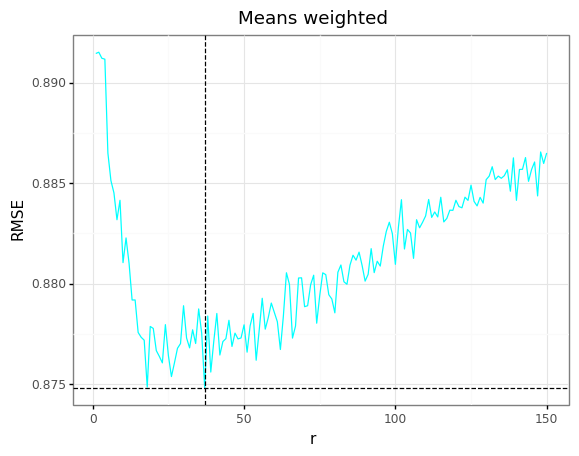

<ggplot: (157930652805)>

In [21]:
plot_nmf_w = ggplot(res_nmf_long[res_nmf_long['variable'] == 'rmse_means_weighted']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value'), color='cyan') + \
    geom_hline(yintercept=best_rmse3, linetype='dashed', color='black') + \
    geom_vline(xintercept=best_r3, linetype='dashed', color='black') + \
    labs(y='RMSE', title='Means weighted')
plot_nmf_w

In [22]:
plot_nmf_w.save(filename='Report/fig/nmf_w.png')

d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: Report/fig/nmf_w.png


In [27]:
best_rmse2

0.8694820049095124